# 1. Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree



# 2. Reading Dataset

In [7]:
# Dataset Link : https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 3. Exploratory Data Analysis

## Dataset Overview

In [8]:
data.shape

(4424, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [10]:
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,7.819,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,4.857,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,5.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,8.000,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,10.000,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,46.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [11]:
# check total null values
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [12]:
# check if values duplicated
data.duplicated().sum()

0

## Target Distribution

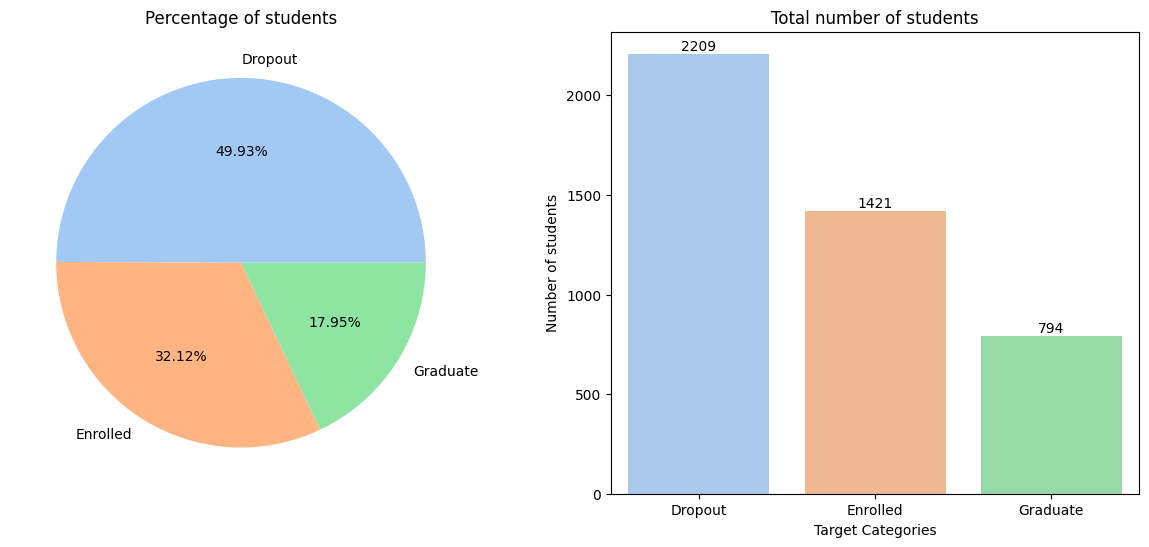

In [13]:
data_pie = data['Target'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart remains unchanged
ax1.pie(data_pie, autopct="%.2f%%", labels=["Dropout", "Enrolled", "Graduate"], colors=sns.color_palette('pastel'))
ax1.set_title('Percentage of students')

# For barplot, to fix the palette warning, assign hue equal to the x values and remove legend:
x_categories = ["Dropout", "Enrolled", "Graduate"]
ax2 = sns.barplot(x=x_categories, y=data_pie.values, hue=x_categories, palette="pastel", dodge=False)
# ax2.get_legend().remove()  # Remove the legend since hue is redundant here
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')

# Instead of using ax2.containers, manually label each bar using ax2.patches
for patch, label in zip(ax2.patches, data_pie.values):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax2.text(x, y, str(label), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### Gender

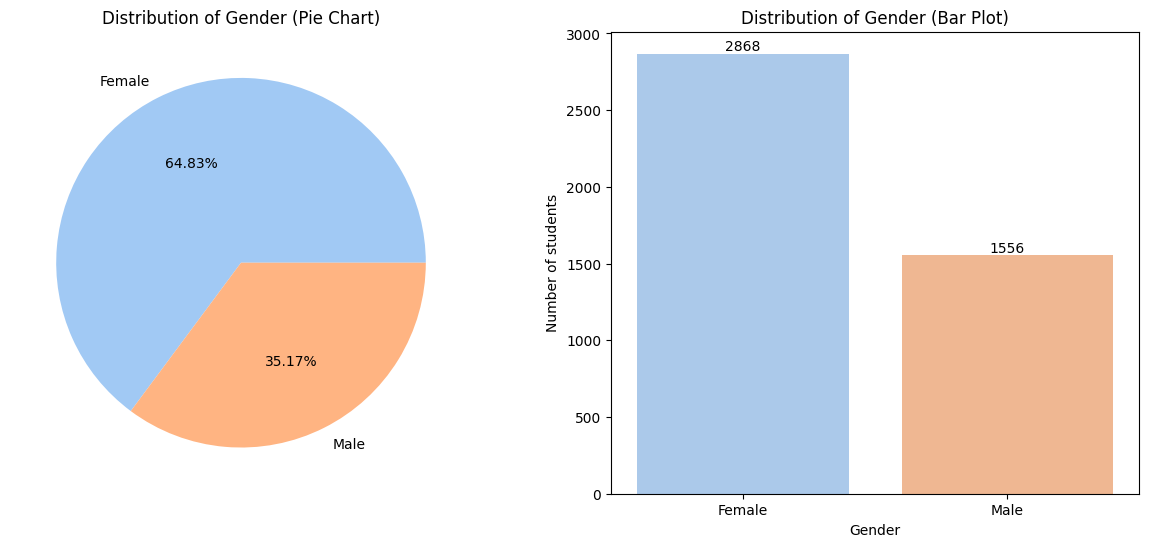

In [14]:
# Get the data and map the gender values
data_gender = data['Gender'].value_counts()
gender_mapping = {0: 'Female', 1: 'Male'}
data_gender_labels = data_gender.index.map(gender_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for gender distribution
ax1.pie(data_gender, labels=data_gender_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Distribution of Gender (Pie Chart)')

# For the barplot, use the labels as both x and hue, then remove the legend
x_categories = data_gender_labels.tolist()
barplot = sns.barplot(x=x_categories, y=data_gender.values, hue=x_categories, palette="pastel", dodge=False, ax=ax2)
# barplot.get_legend().remove()
barplot.set(xlabel='Gender', ylabel='Number of students')
barplot.set_title('Distribution of Gender (Bar Plot)')

# Manually label each bar using the patches
for patch, label in zip(barplot.patches, data_gender.values):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    barplot.text(x, y, str(label), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

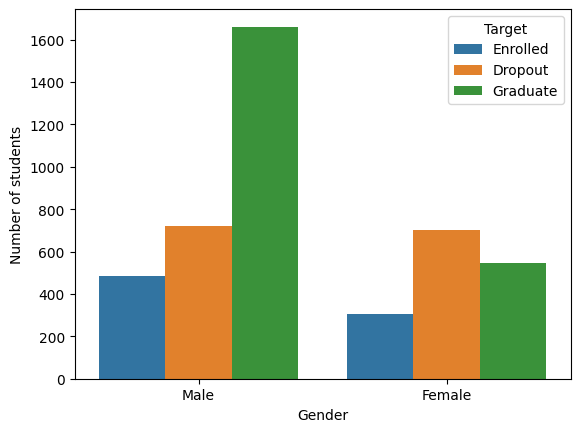

In [15]:
sns.countplot(data=data, x='Gender', hue='Target', order=[0, 1], hue_order=['Enrolled', 'Dropout', 'Graduate'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylabel('Number of students')
plt.show()

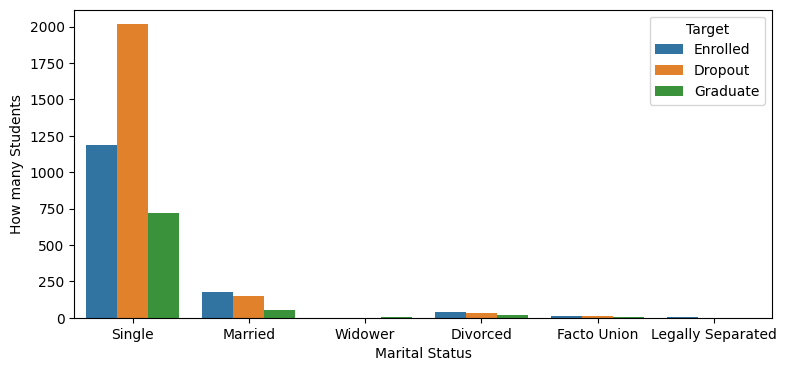

In [16]:
plt.figure(figsize=(9, 4))

sns.countplot(data=data, x='Marital status', hue='Target')

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')

target_labels = ['Enrolled', 'Dropout', 'Graduate']
plt.legend(title='Target', labels=target_labels)

plt.show()


# 4. Data Preprocessing

In [17]:
data_filtered = data[data['Target'] != 'Enrolled']
data_filtered.shape

(3630, 35)

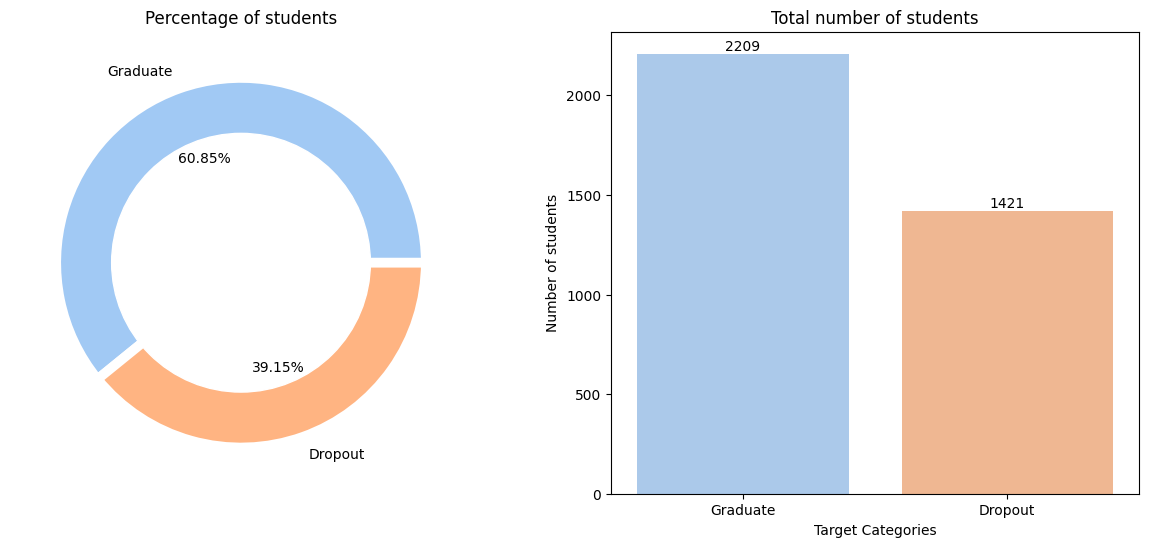

In [18]:
# Get counts from data_filtered (ensure data_filtered exists)
data_counts = data_filtered['Target'].value_counts()
labels = data_counts.index
counts = data_counts.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart with donut effect
circle = plt.Circle((0, 0), 0.7, color='white')
ax1.pie(counts, labels=labels, autopct="%.2f%%",
        colors=sns.color_palette('pastel'),
        wedgeprops={'linewidth': 7, 'edgecolor': 'white'})
ax1.set_title('Percentage of students')
ax1.add_artist(circle)

# Barplot: assign hue to labels to satisfy new requirements, then remove legend
ax2 = sns.barplot(x=labels, y=counts, hue=labels, palette="pastel", dodge=False)
# ax2.get_legend().remove()  # Remove redundant legend
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')

# Manually add labels on each bar
for patch, count in zip(ax2.patches, counts):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax2.text(x, y, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [19]:
data_no_outliers = data_filtered.copy()

data_no_outliers['Target'] = data_no_outliers['Target'].map({
    'Dropout': 0,
    'Graduate': 1
})

In [20]:
data_no_outliers.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [21]:
data_no_outliers.shape

(3630, 35)

## Heatmap Correlation

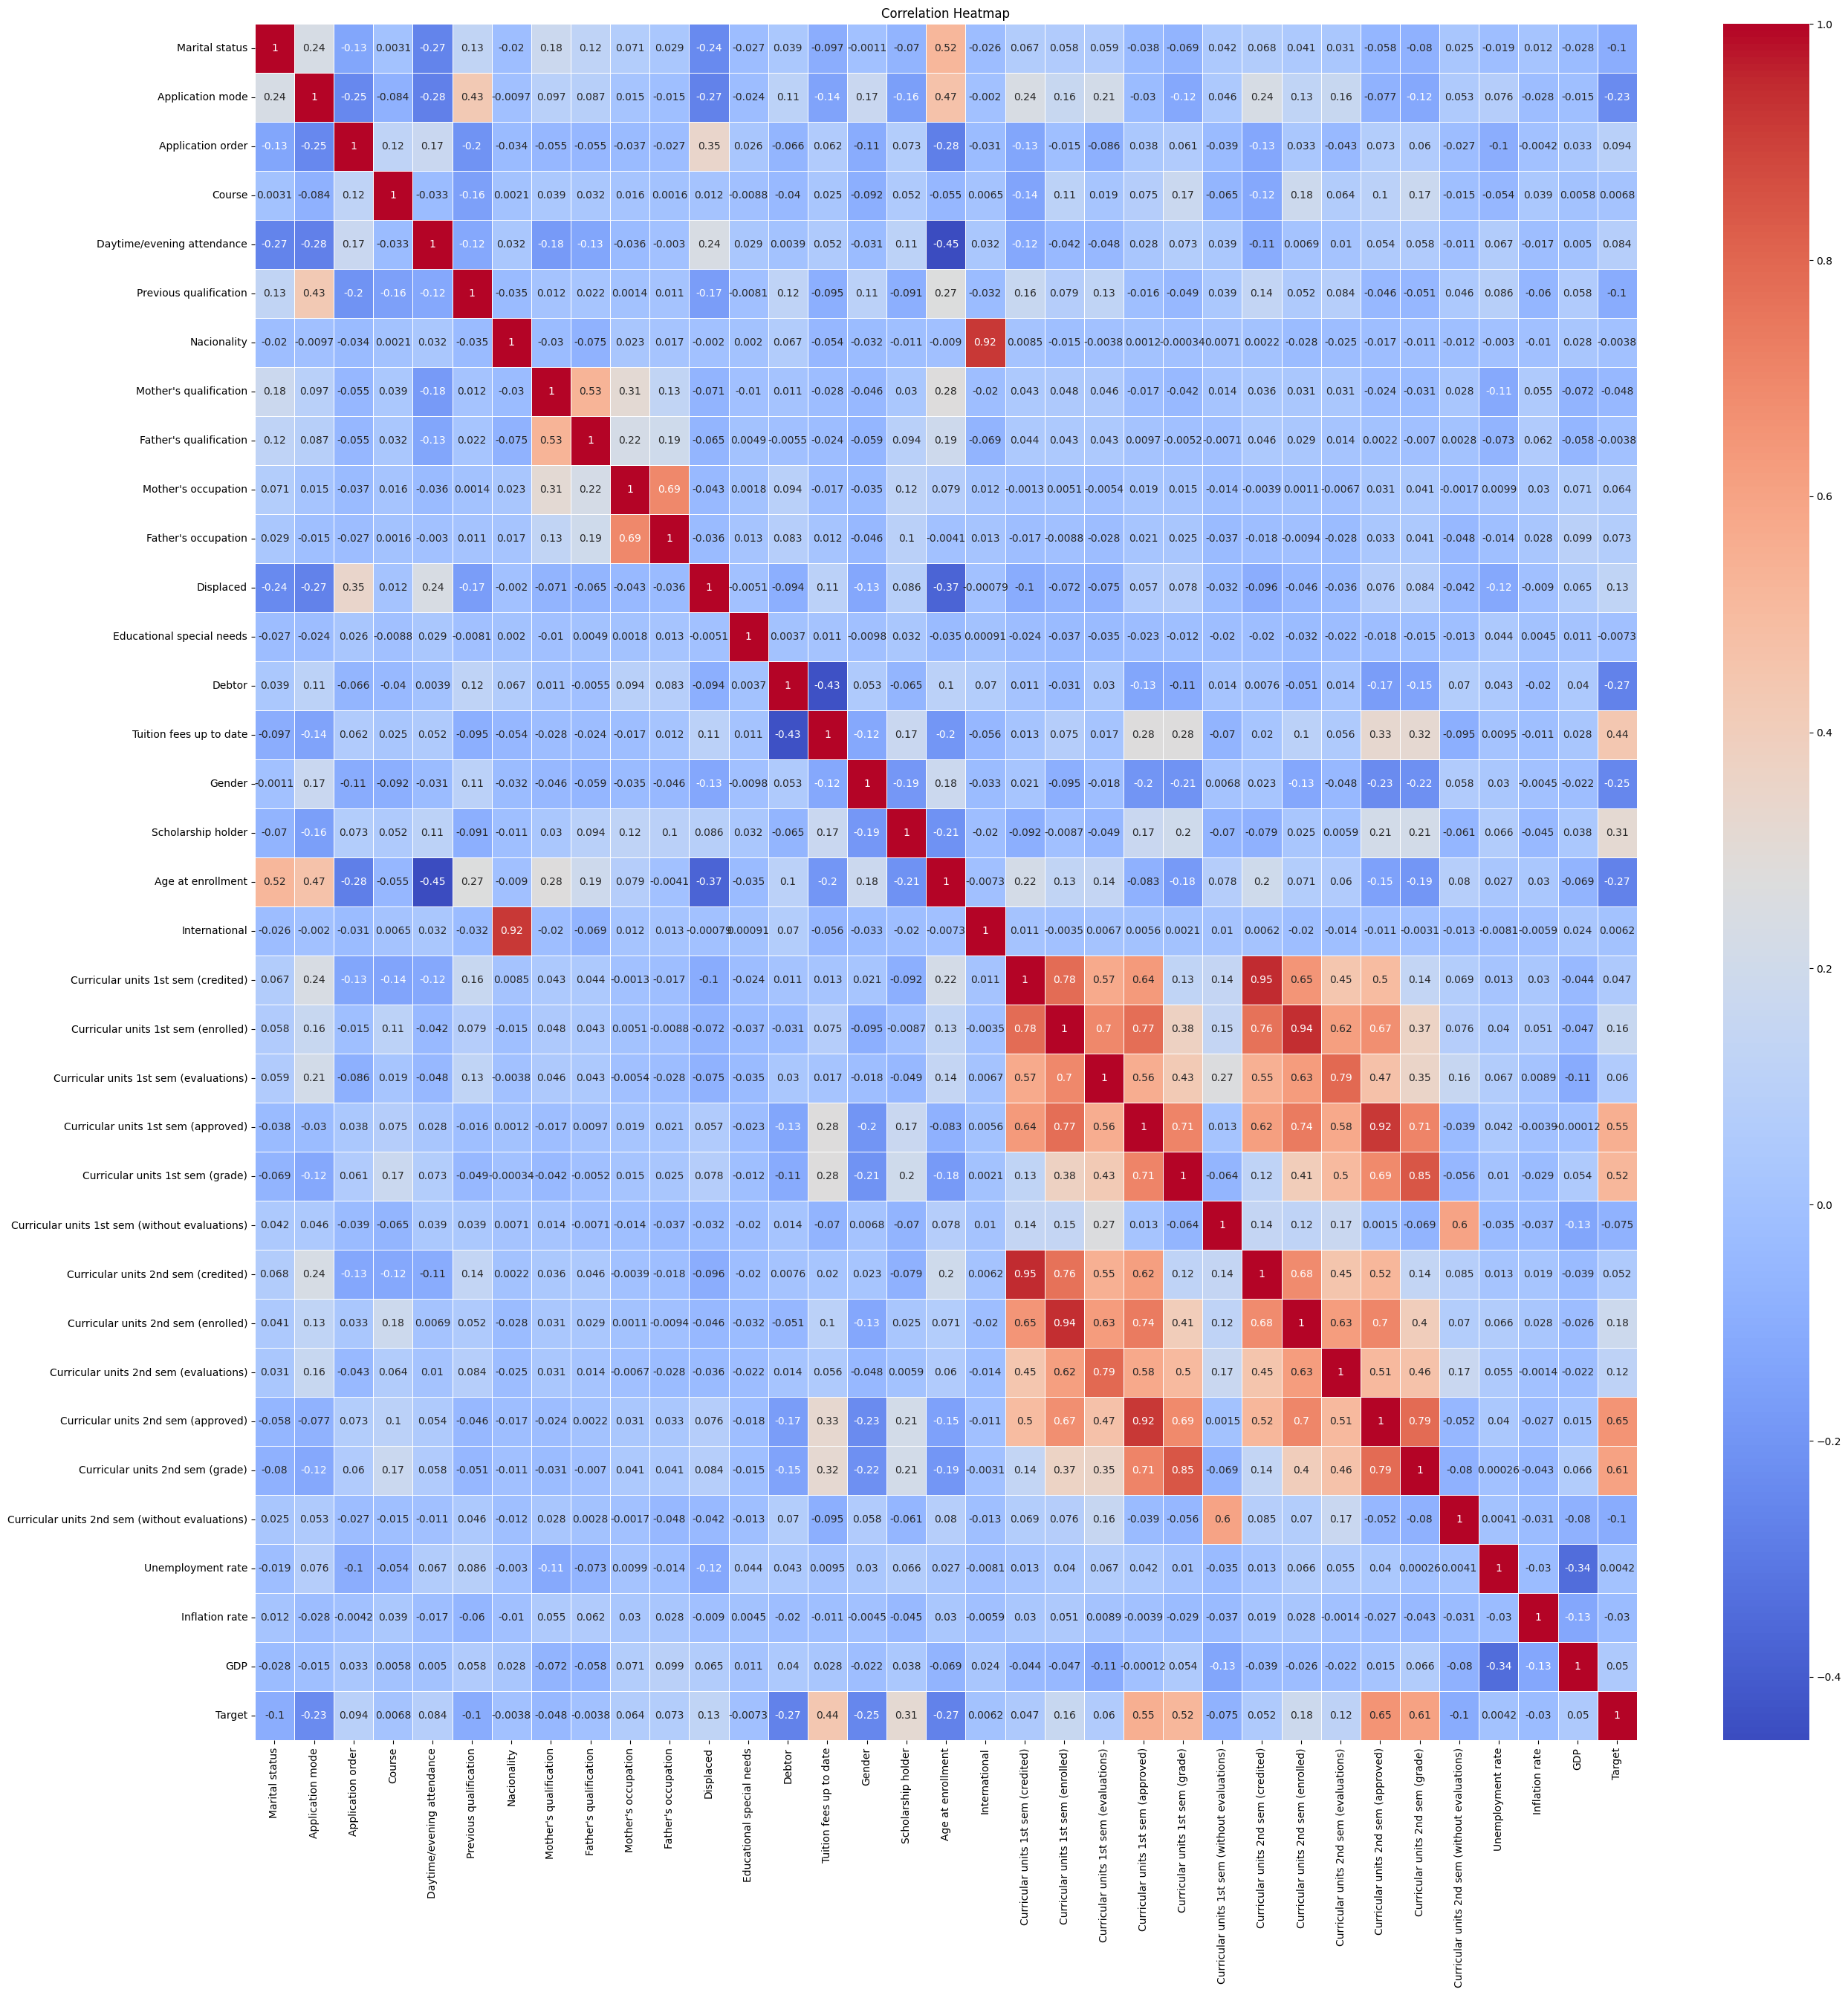

In [22]:
plt.figure(figsize=(30, 30))
sns.heatmap(data_no_outliers.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

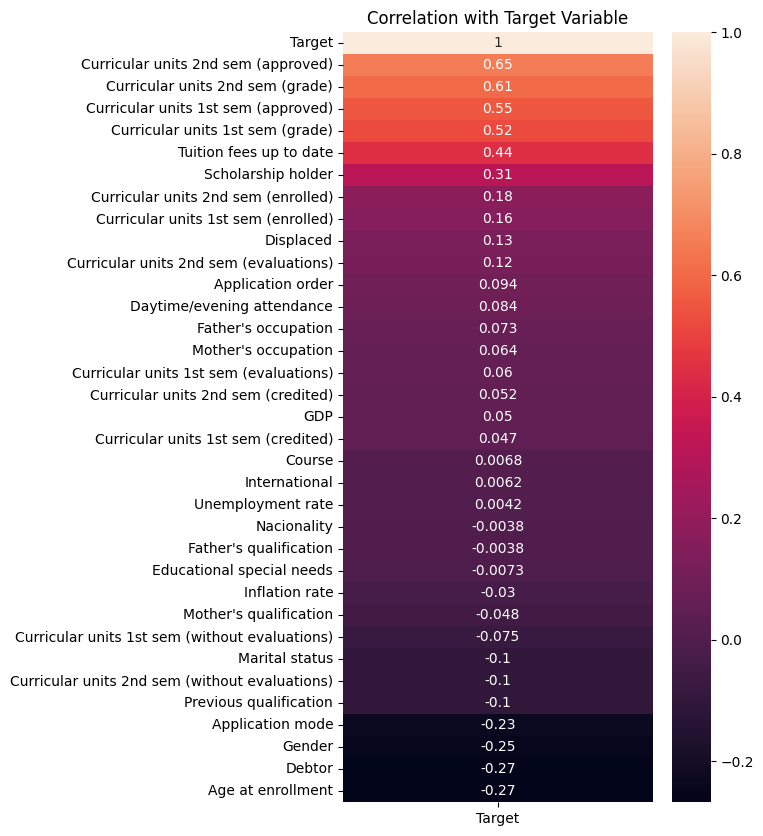

In [23]:
data_2 = data_no_outliers.copy()

data_2.replace("Dropout",0,inplace=True)
data_2.replace("Enrolled",1,inplace=True)
data_2.replace("Graduate",2,inplace=True)


plt.figure(figsize = (5,10))
sns.heatmap(data_2.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Correlation with Target Variable')
plt.show()

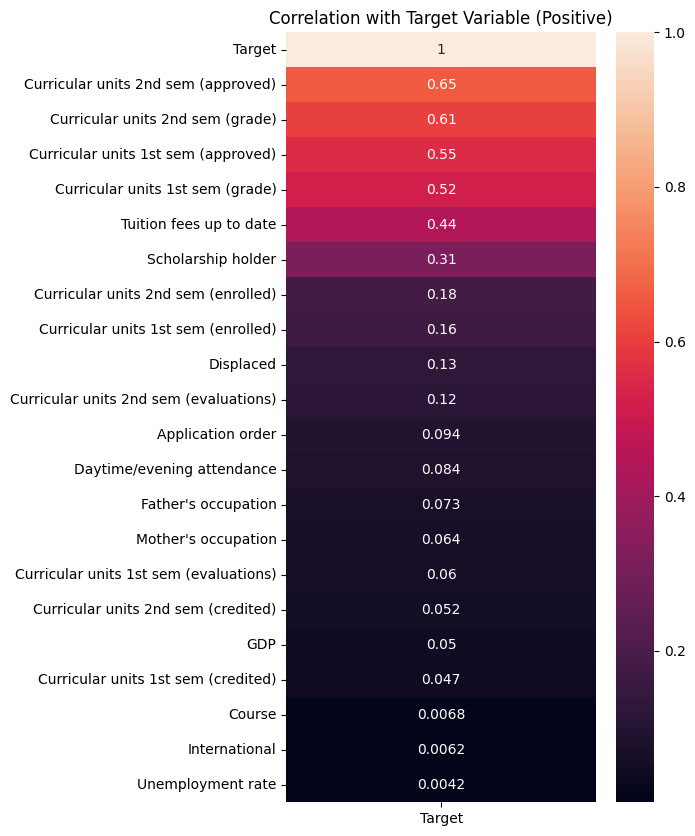

In [24]:
correlation_matrix = data_2.corr()

positive_correlation_features = correlation_matrix['Target'][correlation_matrix['Target'] > 0].index

data_no_outliers = data_2[positive_correlation_features]

plt.figure(figsize=(5, 10))
sns.heatmap(data_no_outliers.corr()[['Target']].sort_values(by='Target', ascending=False), annot=True)
plt.title('Correlation with Target Variable (Positive)')
plt.show()

In [25]:
data_no_outliers.shape

(3630, 22)

## Box Plot

<ipython-input-26-06e22af6dea0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
<ipython-input-26-06e22af6dea0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
<ipython-input-26-06e22af6dea0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
<ipython-input-26-06e22af6dea0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

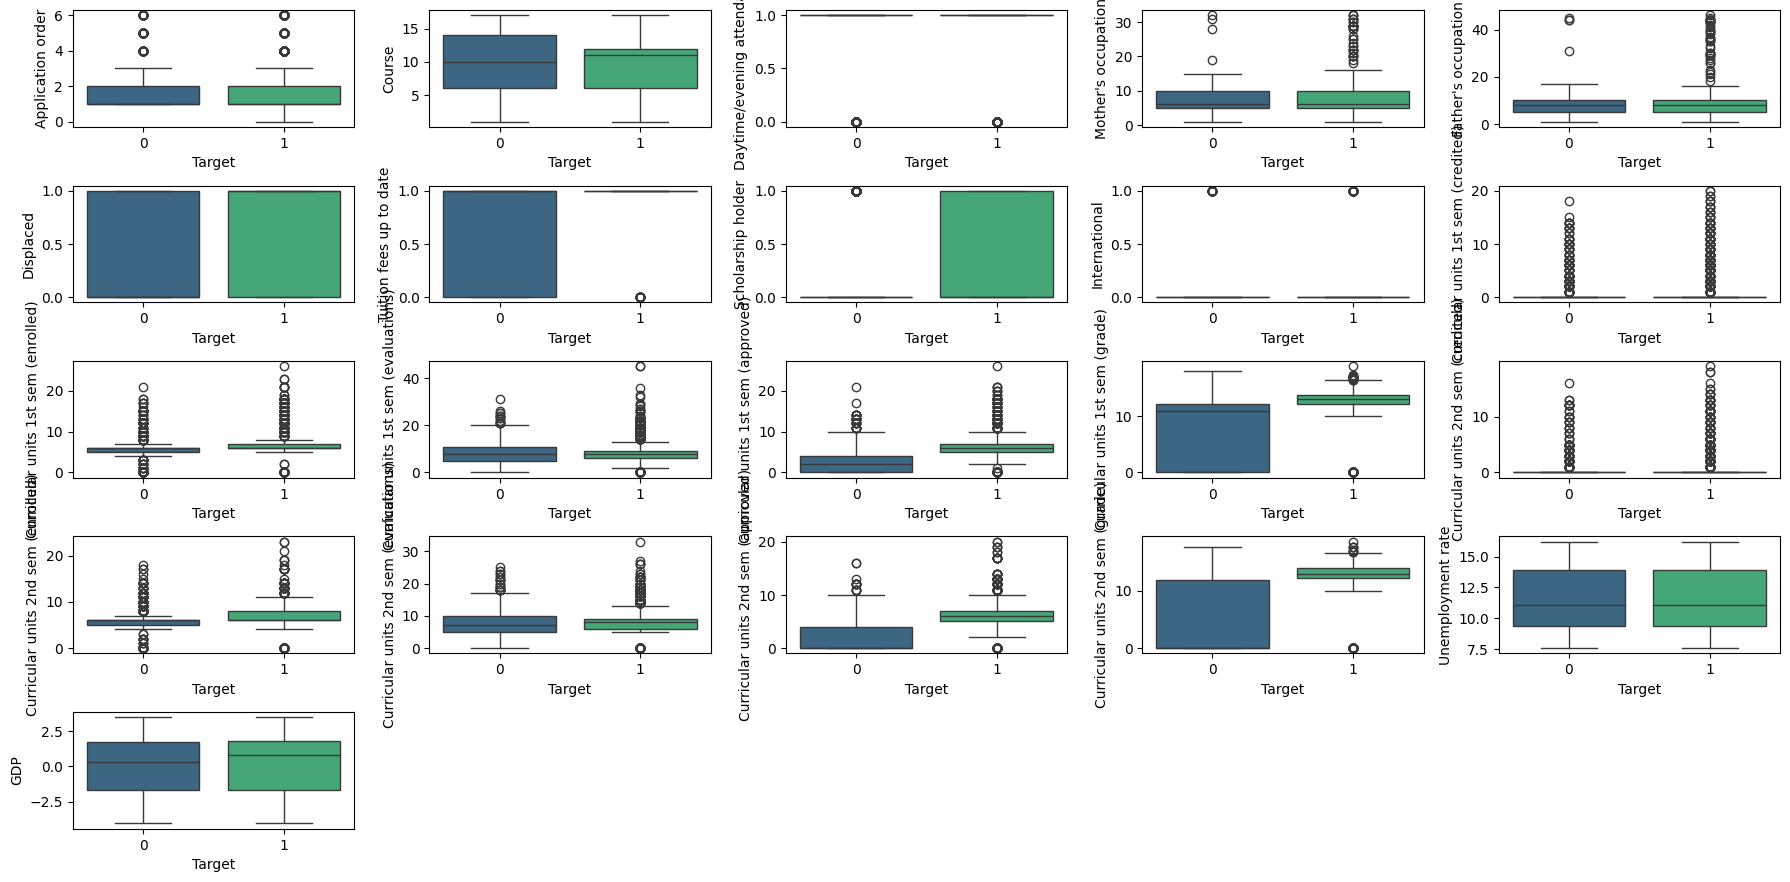

In [26]:
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-27-99a54cdb2e49>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
<ipython-input-27-99a54cdb2e49>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
<ipython-input-27-99a54cdb2e49>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
<ipython-input-27-99a54cdb2e49>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

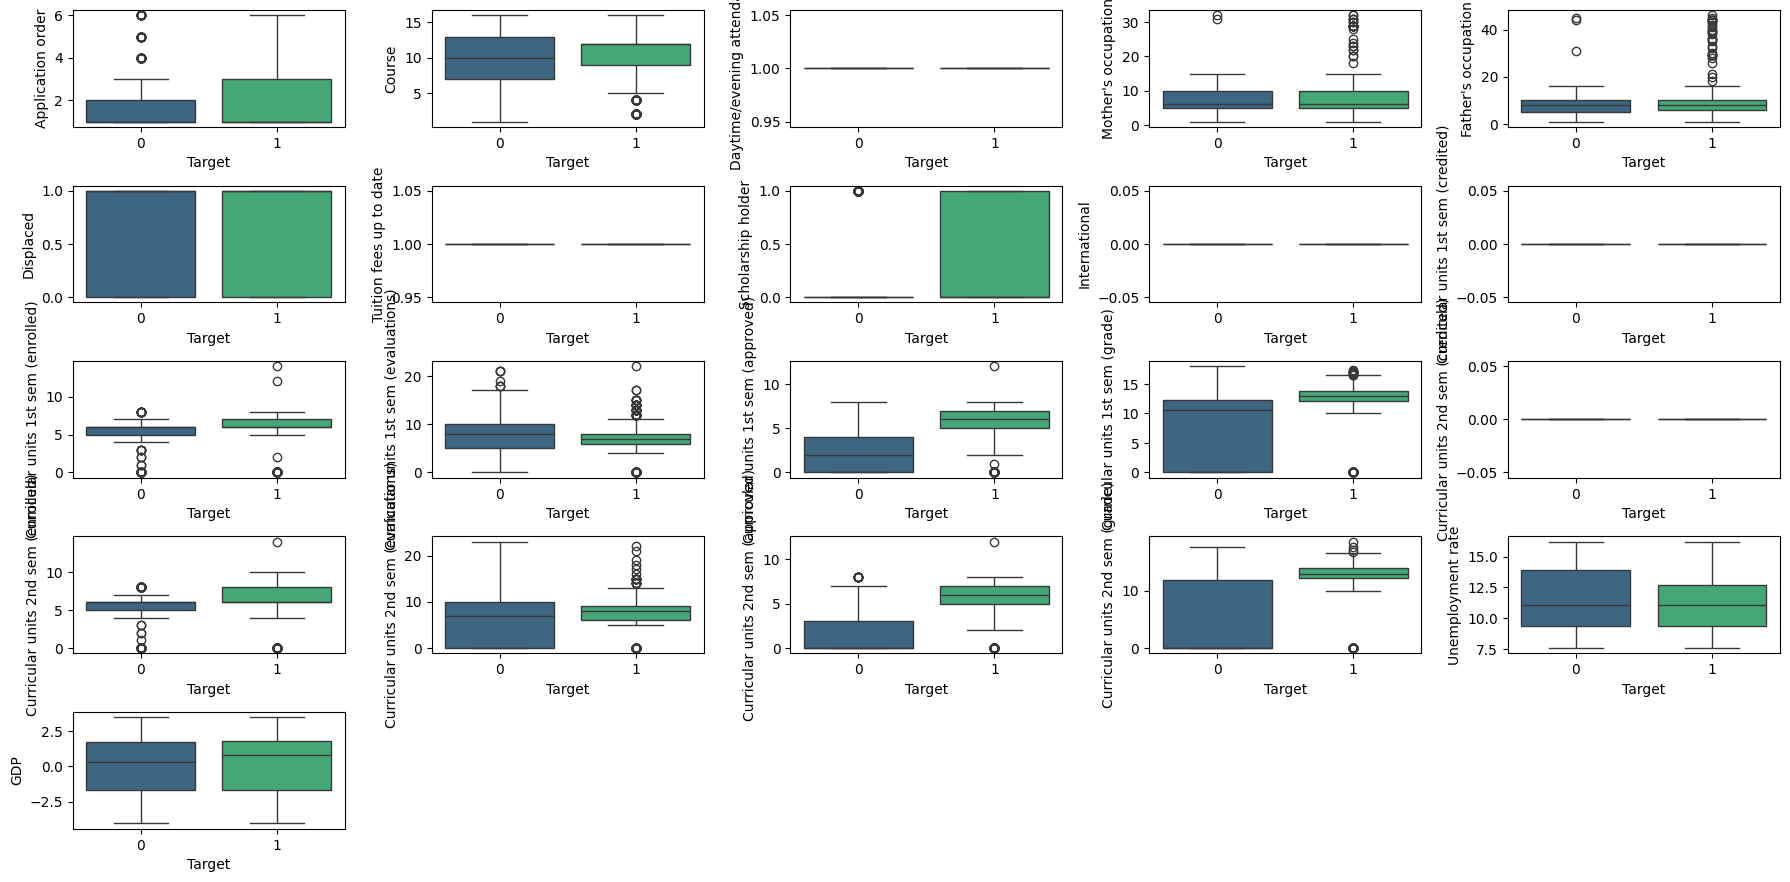

In [27]:
def remove_outliers_iqr(df, column, k):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in data_no_outliers.columns[:-1]:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col, 10)

plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

In [28]:
data.shape

(4424, 35)

In [29]:
data_no_outliers.shape

(2437, 22)

# 5. Model Selection and Training

In [30]:
X = data_no_outliers.drop('Target', axis=1)
y = data_no_outliers['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Names=list(X_train.columns.values)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1632, 21)
X_test :  (805, 21)
y_train :  (1632,)
y_test :  (805,)


In [32]:
print("\nCounts of targets in y_train:")
print("Target 0:", sum(y_train == 0))
print("Target 1:", sum(y_train == 1))


Counts of targets in y_train:
Target 0: 477
Target 1: 1155


In [33]:
algorithms = ['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']
accuracies = []
precisions = []
recalls = []
f1_scores = []


def append_metrics(accuracy, precision, recall, f1):
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

## 1-  K-Nearest Neighbors

Best Parameters: {'n_neighbors': 13}
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-score: 0.87


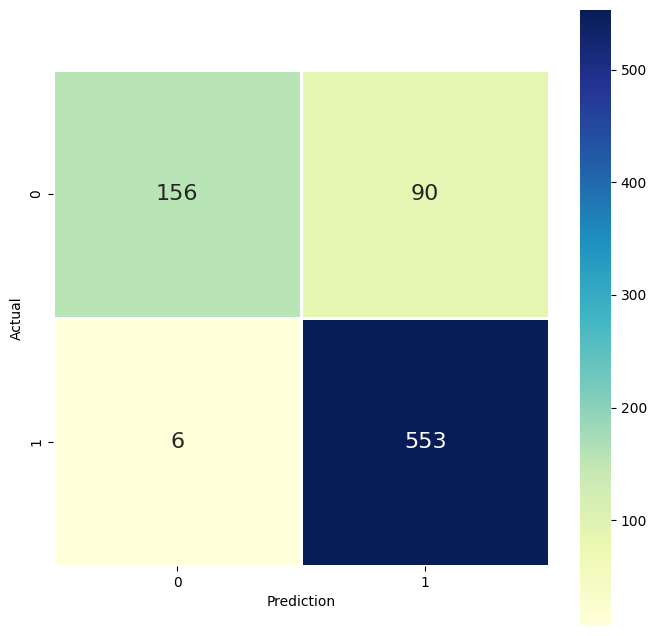

In [34]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()


## 2- Logistic Regression


Best Parameters for Logistic Regression: {'C': 1}

Logistic Regression with Hyperparameter Tuning:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90


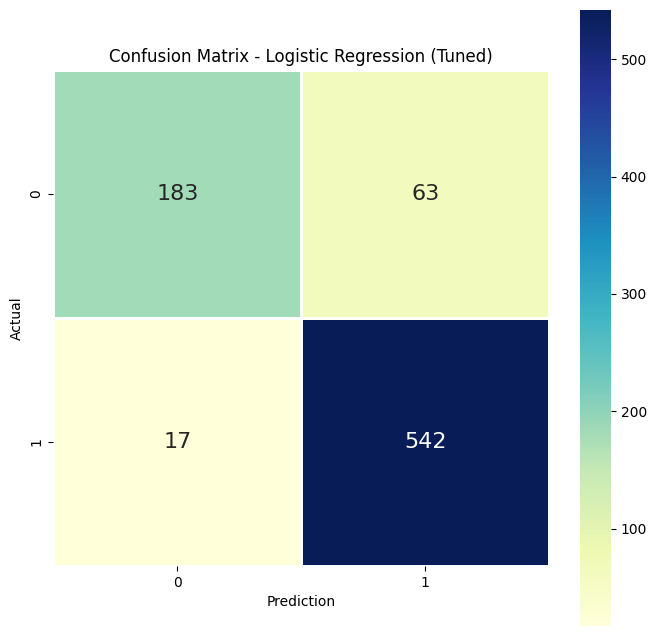

In [35]:

param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)

best_params_logistic = grid_search_logistic.best_params_

print("\nBest Parameters for Logistic Regression:", best_params_logistic)

best_logistic_model = LogisticRegression(C=best_params_logistic['C'], random_state=42)
best_logistic_model.fit(X_train, y_train)

y_pred_logistic_tuned = best_logistic_model.predict(X_test)

accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
precision_logistic_tuned, recall_logistic_tuned, f1_logistic_tuned, _ = precision_recall_fscore_support(y_test, y_pred_logistic_tuned, average='weighted')

print("\nLogistic Regression with Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_logistic_tuned:.2f}")
print(f"Precision: {precision_logistic_tuned:.2f}")
print(f"Recall: {recall_logistic_tuned:.2f}")
print(f"F1-score: {f1_logistic_tuned:.2f}")

append_metrics(accuracy_logistic_tuned, precision_logistic_tuned, recall_logistic_tuned, f1_logistic_tuned)

cm_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_logistic_tuned, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()

## 3- Decision Tree

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.813 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.844 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.850 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

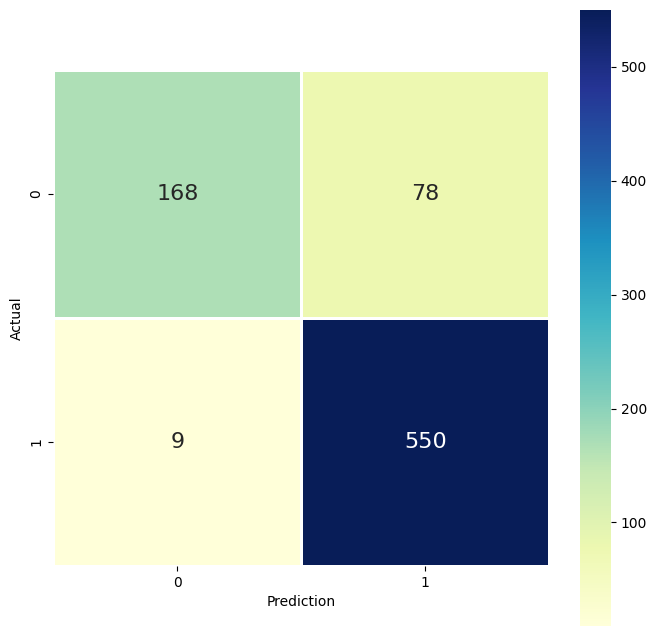

In [36]:
tree_clas = DecisionTreeClassifier(random_state=1024)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }


grid_search = GridSearchCV(tree_clas, param_grid, cv=5, scoring='accuracy', refit = True, verbose = 3)
grid_search.fit(X_train, y_train)

best_params_tree_clas = grid_search.best_params_
print("Best Parameters:", best_params_tree_clas)

best_tree_clas = DecisionTreeClassifier(max_features=best_params_tree_clas['max_features'], ccp_alpha=best_params_tree_clas['ccp_alpha'], max_depth=best_params_tree_clas['max_depth'], criterion=best_params_tree_clas['criterion'] )
best_tree_clas.fit(X_train, y_train)

y_pred = best_tree_clas.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

## 4- Random Forest

Best Parameters: {'max_depth': 20, 'n_estimators': 150}
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-score: 0.90


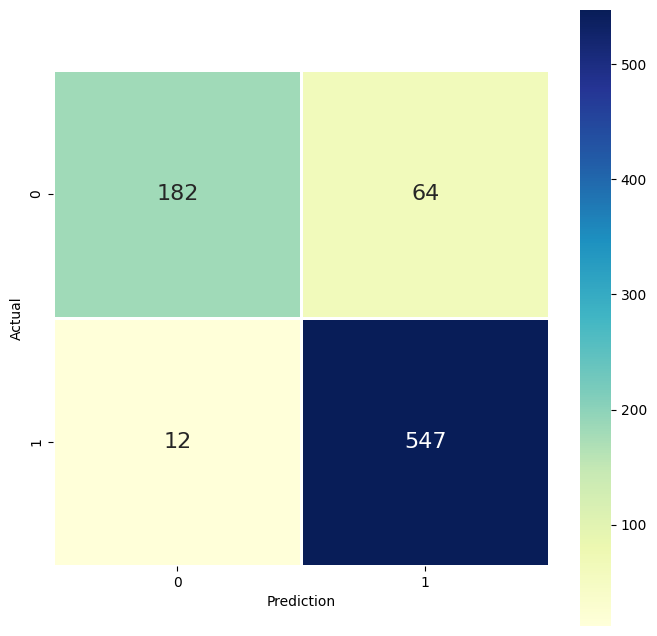

In [37]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

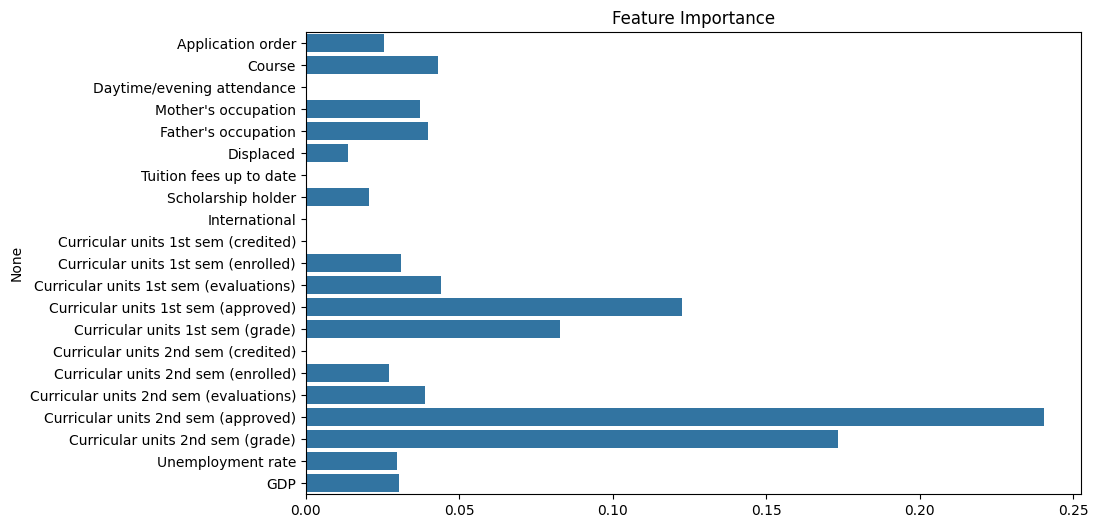

In [38]:
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

## 5- SVM

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.847 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.841 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.847 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.859 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.856 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

<Axes: >

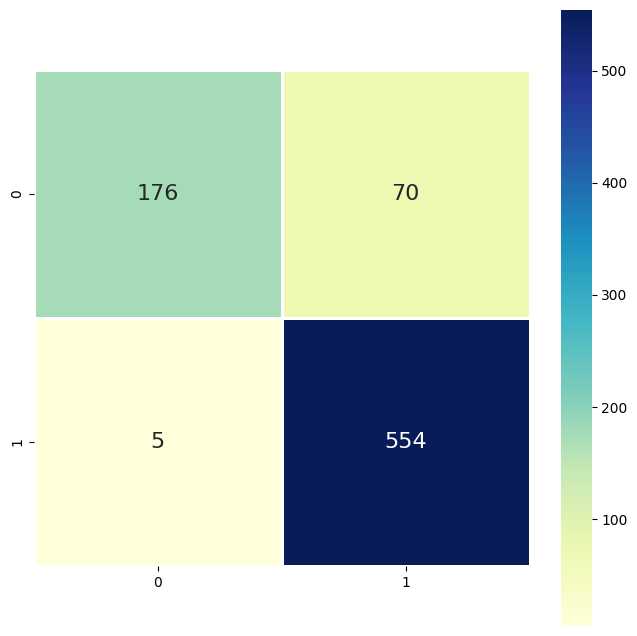

In [39]:
svcC = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(svcC, param_grid, cv=5, scoring='accuracy', refit=True, verbose=3)
grid_search.fit(X_train, y_train)

best_params_SVC = grid_search.best_params_
print("Best Parameters:", best_params_SVC)

best_svcC = SVC(gamma=best_params_SVC['gamma'], kernel=best_params_SVC['kernel'], C=best_params_SVC['C'])
best_svcC.fit(X_train, y_train)

y_pred = best_svcC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)


## 6-  Naive Bayes

Naive Bayes Classification:
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-score: 0.88


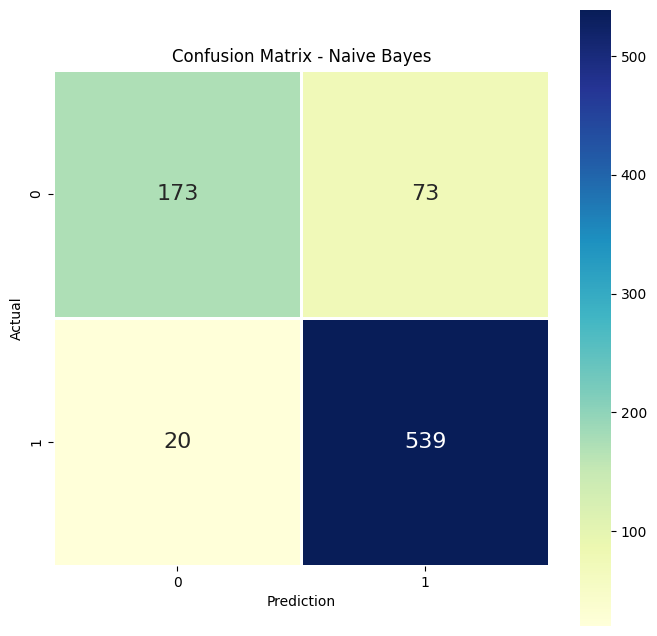

In [40]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)


y_pred_naive_bayes = naive_bayes_model.predict(X_test)


accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes, recall_naive_bayes, f1_naive_bayes, _ = precision_recall_fscore_support(y_test, y_pred_naive_bayes, average='weighted')

print("Naive Bayes Classification:")
print(f"Accuracy: {accuracy_naive_bayes:.2f}")
print(f"Precision: {precision_naive_bayes:.2f}")
print(f"Recall: {recall_naive_bayes:.2f}")
print(f"F1-score: {f1_naive_bayes:.2f}")

append_metrics(accuracy_naive_bayes, precision_naive_bayes, recall_naive_bayes, f1_naive_bayes)

cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_naive_bayes, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()



# 7. Model Evaluation and Comparison

In [41]:
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1_scores
})

In [42]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Algorithm,Accuracy,Precision,Recall,F1
4,SVM,0.906832,0.913660,0.906832,0.902301
3,Random Forest,0.905590,0.908361,0.905590,0.902109
1,Logistic Regression,0.900621,0.901714,0.900621,0.897460
2,Decision Tree,0.891925,0.898213,0.891925,0.886252
5,Naive Bayes,0.884472,0.885503,0.884472,0.880113
0,K-Nearest Neighbors,0.880745,0.891486,0.880745,0.872636


In [44]:
import pickle

# Save the best SVM model (assuming it was the highest performing)
print("Saving the best SVM model and preprocessing components...")

# Save model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_svcC, f)

# Save feature names (important for interpretation)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(Names, f)

# Save the scaler (essential for preprocessing new data correctly)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save a sample of the training data for reference (useful for debugging)
sample_data = {
    'X_sample': X.iloc[:5].values.tolist(), # First 5 samples
    'feature_names': Names
}
with open('sample_data.pkl', 'wb') as f:
    pickle.dump(sample_data, f)

print("Model and components saved successfully!")


Saving the best SVM model and preprocessing components...
Model and components saved successfully!
